**Problem Statement: A real estate wants to develop a model to accurately predict real estate prices for houses in Chennai   
                     based on the past transactions undef the firm.**

**Importing libraries**

In [185]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

**Loading Dataset**

In [268]:
df=pd.read_csv("house.csv")

**Checking the shape of dataset**

In [187]:
df.shape

(7109, 22)

In [269]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**Identifying Continous and Categorical variables**

In [189]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [190]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [191]:
df.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,...,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,2798,NaN,NaN,NaN,NaN,9,3,...,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,P05120,Chrompet,NaN,06-10-2009,NaN,NaN,NaN,NaN,AdjLand,Yes,...,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,12,NaN,NaN,NaN,NaN,1433,3587,...,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,NaN,99.603179,1.637029,1.213260,3.688704,NaN,NaN,...,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,NaN,57.403110,0.802902,0.409639,1.019099,NaN,NaN,...,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,NaN,0.000000,1.000000,1.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,NaN,50.000000,1.000000,1.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,NaN,99.000000,1.000000,1.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,NaN,148.000000,2.000000,1.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07


In [192]:
df.isnull()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7107,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [193]:
df.isnull().sum()


PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [194]:
temp=pd.DataFrame(index=df.columns)
temp ['data_type']=df.dtypes
temp ['null_count']=df.isnull().sum()
temp ['unique_count']=df.nunique()

In [195]:
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DATE_SALE,object,0,2798
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3


**Univariate Analysis**

Text(0.5, 0, 'Sales')

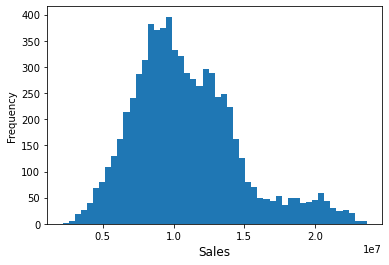

In [196]:
#target variable
df['SALES_PRICE'].plot.hist(bins=50)
plt.xlabel('Sales',fontsize=12)

This histograph is slightly right skewed.

<AxesSubplot:ylabel='Frequency'>

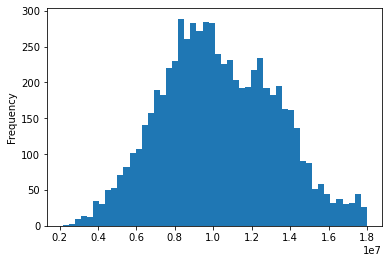

In [197]:
(df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000]).plot.hist(bins=50)

Text(0.5, 0, 'Area in square feet')

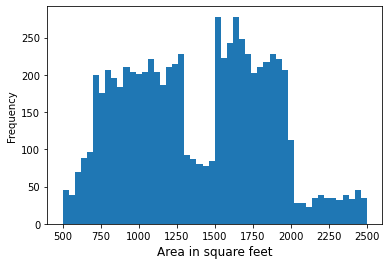

In [198]:
#Area of house in Square Feet
df['INT_SQFT'].plot.hist(bins=50)
plt.xlabel('Area in square feet',fontsize=12)

**Value counts**

In [199]:
#number of bedrooms
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [200]:
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

In [201]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [202]:
df['N_BATHROOM'].value_counts()/len(df)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

**Bar plot**

<AxesSubplot:>

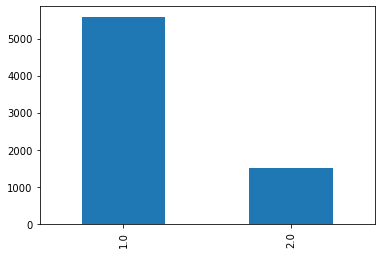

In [203]:
df['N_BATHROOM'].value_counts().plot(kind='bar')

<AxesSubplot:>

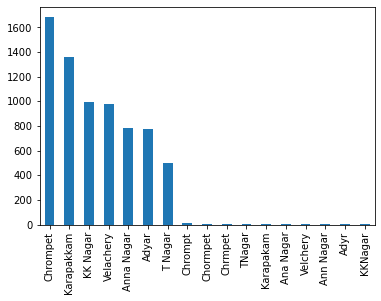

In [204]:
df['AREA'].value_counts().plot(kind='bar')

<AxesSubplot:>

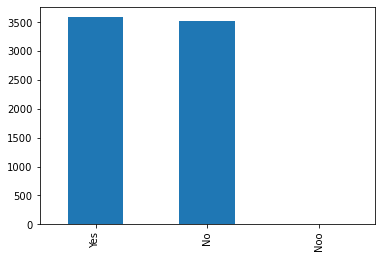

In [205]:
df['PARK_FACIL'].value_counts().plot(kind='bar')

<AxesSubplot:>

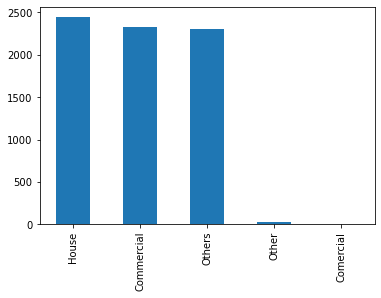

In [206]:
df['BUILDTYPE'].value_counts().plot(kind='bar')

<AxesSubplot:>

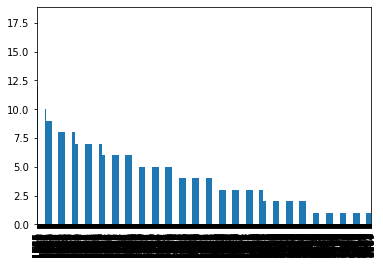

In [207]:
df['INT_SQFT'].value_counts().plot(kind='bar')

<AxesSubplot:>

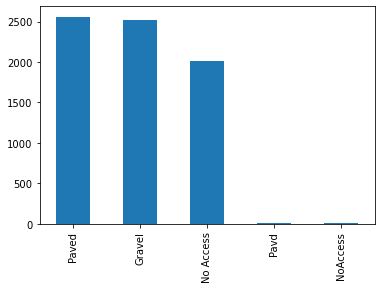

In [208]:
df['STREET'].value_counts().plot(kind='bar')

<AxesSubplot:>

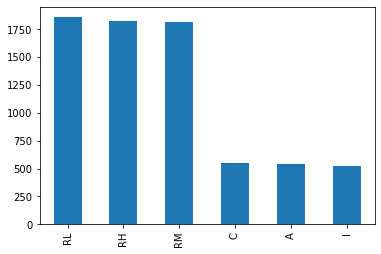

In [209]:
df['MZZONE'].value_counts().plot(kind='bar')

<AxesSubplot:>

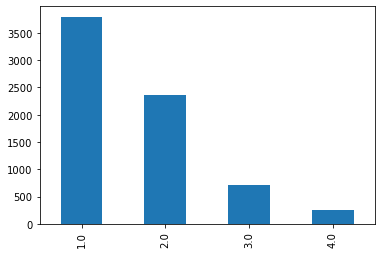

In [210]:
df['N_BEDROOM'].value_counts().plot(kind='bar')

<AxesSubplot:>

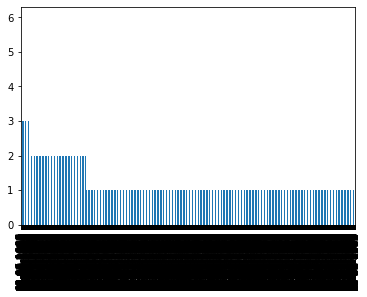

In [211]:
df['DATE_BUILD'].value_counts().plot(kind='bar')

**Data Manipulation**

1. Drop Duplicates(if any)
2. Fill the missing values
3. Correct the datatype
4. fix the spelling errors in variables

**Drop Duplicates (if any)**

In [212]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


No duplicate rows are present in dataset, shape is 7109rows and 22 columns

**Missing Values**

In [213]:
#missing values

df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**Different ways to deal with missing values**

1. Remove the rows with missing values
2. Mean or median in case of continous variables
3. With mode in case of categorical variable
4. Using other independent variables

We will impute missing values

**1. N_BEDROOM**

In [270]:
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [273]:
df['N_BEDROOM'].fillna(value=(df['N_BEDROOM'].mode()[0]),inplace=True)

**2. N_BATHROOM**

In [274]:
df.loc[df['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,22-03-2010,39,1.0,NaN,4,Partial,No,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
5087,P01333,Chrompet,1016,02-08-2012,105,1.0,NaN,3,AbNormal,Yes,...,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,330086,106479,10647920
6134,P01332,Chormpet,916,02-08-2012,173,1.0,NaN,3,Normal Sale,Yes,...,ELO,Paved,RL,3.4,3.5,3.0,NaN,265423,44237,8847420
6371,P01189,Chrompet,1035,06-11-2012,90,1.0,NaN,3,Partial,No,...,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,223403,24823,8274200
6535,P09189,Anna Nagar,1864,05-03-2007,184,2.0,NaN,5,Family,Yes,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [275]:
for i in range(0, len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if(df['N_BEDROOM'][i]==1.0):
            df['N_BATHROOM'][i]=1.0
        else:
            df['N_BATHROOM'][i]=2.0
            
                
                
            

<ipython-input-275-3b64bd379a50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['N_BATHROOM'][i]=1.0
<ipython-input-275-3b64bd379a50>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['N_BATHROOM'][i]=2.0


**3. QS_OVERALL**

In [276]:
df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM
0,4.0,3.9,4.9
1,4.9,4.2,2.5
2,4.1,3.8,2.2
3,4.7,3.9,3.6
4,3.0,2.5,4.1


In [277]:
temp=(df['QS_ROOMS']+df['QS_BATHROOM']+df['QS_BEDROOM'])/3
pd.concat([df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_BEDROOM'], temp], axis=1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


-> Imputing missing values with the help of other 'quality score' columns

In [278]:
df.loc[df['QS_OVERALL'].isnull()==True].shape

(48, 22)

48 values are missing

In [279]:
def fill_na(x):
    return ((x['QS_ROOMS']+x['QS_BATHROOM']+x['QS_BEDROOM'])/3)

In [280]:
df['QS_OVERALL']=df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'],axis=1 )

In [281]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

All the missing values are filled by imputation

**Data Types**

In [282]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [283]:
#data type of n_bedroom,n_bathroom,n_room
df=df.astype({'N_BEDROOM':'object','N_ROOM':'object','N_BATHROOM':'object'})

Replace Categories


In [226]:
temp=['AREA','N_BEDROOM','N_ROOM','N_BATHROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('******Value count in',i,'*********')
    print(df[i].value_counts())
    print(' ')

******Value count in AREA *********
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64
 
******Value count in N_BEDROOM *********
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64
 
******Value count in N_ROOM *********
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64
 
******Value count in N_BATHROOM *********
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64
 
******Value count in SALE_COND *********
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64
 
******Value count in PAR

Names of rhe columns that need updation:

1. AREA
2. SALE_COND
3. PARK_FACIL
4. BUILDTYPE
5. UTILITY_AVAIL
6. STREET

In [284]:
df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)
df['PARK_FACIL'].value_counts()


Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [285]:
df['AREA'].replace({'TNagar':'T Nagar','Adyr':'Adyar','KKNagar':'KK Nagar','Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Karapakam':'Karapakkam','Velchery':'Velachery'},inplace=True)

In [286]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [287]:
df['SALE_COND'].replace({'PartiaLl':'Partial','Partiall':'Partial','Adj Land':'AdjLand','Ab Normal':'AbNormal'},inplace=True)

In [288]:
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [289]:
df['STREET']

0           Paved
1          Gravel
2          Gravel
3           Paved
4          Gravel
          ...    
7104    No Access
7105    No Access
7106       Gravel
7107        Paved
7108        Paved
Name: STREET, Length: 7109, dtype: object

In [290]:
df['BUILDTYPE']

0       Commercial
1       Commercial
2       Commercial
3           Others
4           Others
           ...    
7104        Others
7105        Others
7106         House
7107    Commercial
7108        Others
Name: BUILDTYPE, Length: 7109, dtype: object

<AxesSubplot:>

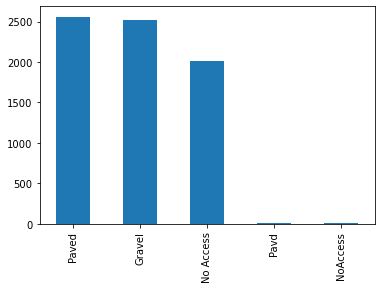

In [291]:
df['STREET'].value_counts().plot(kind='bar')

In [292]:
df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)

<AxesSubplot:>

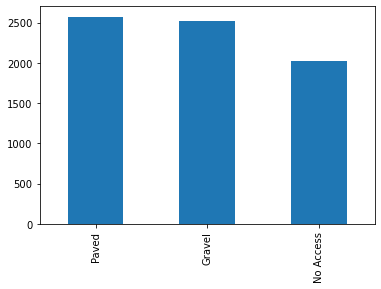

In [293]:
df['STREET'].value_counts().plot(kind='bar')

<AxesSubplot:>

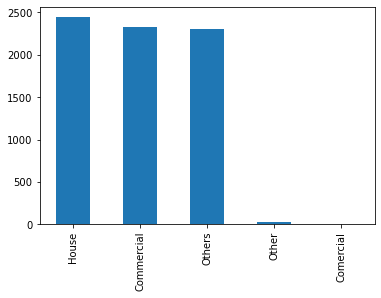

In [294]:
df['BUILDTYPE'].value_counts().plot(kind='bar')

In [295]:
df['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'},inplace=True)

<AxesSubplot:>

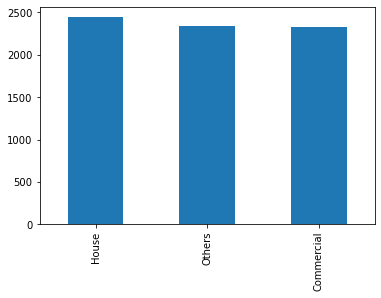

In [296]:
df['BUILDTYPE'].value_counts().plot(kind='bar')

<AxesSubplot:>

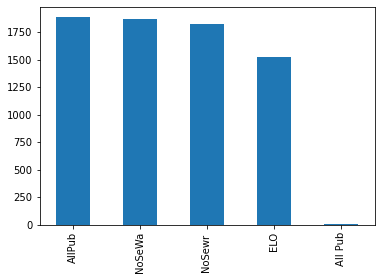

In [297]:
df['UTILITY_AVAIL'].value_counts().plot(kind='bar')

In [298]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace=True)

<AxesSubplot:>

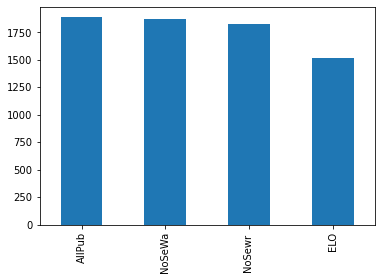

In [299]:
df['UTILITY_AVAIL'].value_counts().plot(kind='bar')

-> AllPub: All Public Facilities available(E,G,W, &S)
-> NoSerw: Electricity, Gas and Water
-> NoSeWa: Electricity and Gas Only
-> ELO: Electricity Only

In [300]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**PERFORMING BIVARITE ANALYSIS**

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

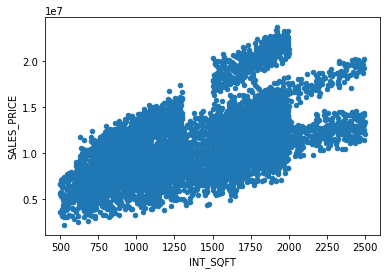

In [301]:
df.plot.scatter('INT_SQFT','SALES_PRICE')

A linear relationship is clearly visible.

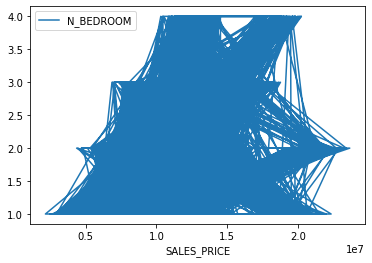

In [326]:
df.plot('SALES_PRICE','N_BEDROOM').type='bar'

<AxesSubplot:xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

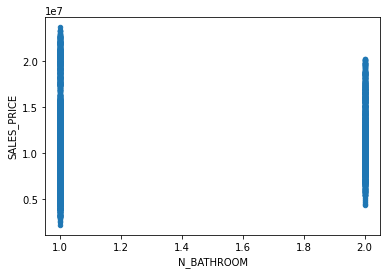

In [303]:
df.plot.scatter('N_BATHROOM','SALES_PRICE')

<AxesSubplot:xlabel='QS_ROOMS', ylabel='SALES_PRICE'>

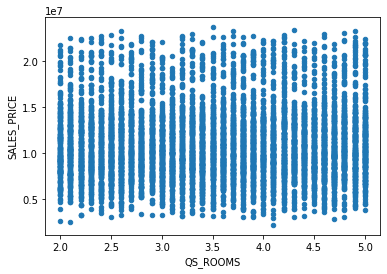

In [304]:
df.plot.scatter('QS_ROOMS','SALES_PRICE')

<AxesSubplot:xlabel='COMMIS', ylabel='SALES_PRICE'>

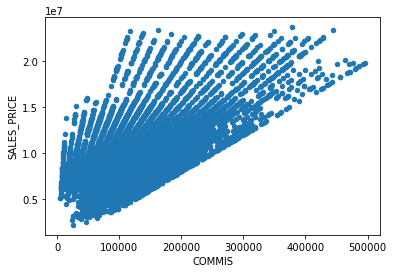

In [305]:
df.plot.scatter('COMMIS','SALES_PRICE')

<AxesSubplot:xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

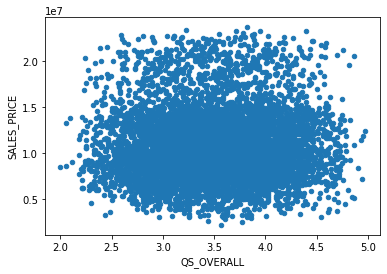

In [306]:
df.plot.scatter('QS_OVERALL','SALES_PRICE')

<AxesSubplot:>

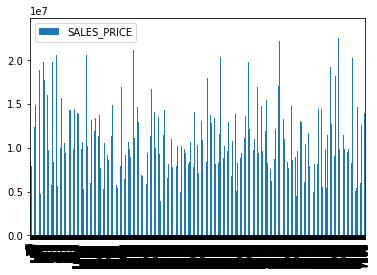

In [253]:
df[['AREA','SALES_PRICE']].plot(kind='bar')

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

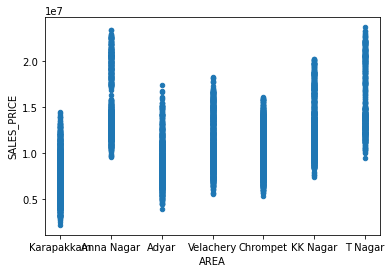

In [254]:
df.plot.scatter('AREA','SALES_PRICE')

**OrdinaryEncoder**

In [310]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [256]:
enc=OrdinalEncoder()

In [257]:
print(enc)

OrdinalEncoder()


In [258]:
enc.fit_transform(df[["AREA"]])

array([[4.],
       [1.],
       [0.],
       ...,
       [6.],
       [4.],
       [6.]])

In [259]:
df[['AREA']]=enc.fit_transform(df[['AREA']])

In [260]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,4.0,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,1.0,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,0.0,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,6.0,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,4.0,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [261]:
area=['T Nagar','Anna Nagar','KK Nagar','Velachery','Adyar','Chrompet','Karapakkam']

In [262]:
enc=OrdinalEncoder(categories=[area])

In [267]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,4.0,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,1.0,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,0.0,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,6.0,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,4.0,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [311]:
enc.fit_transform(df[['AREA']])

array([[6.],
       [1.],
       [4.],
       ...,
       [3.],
       [6.],
       [3.]])

In [312]:
df[['AREA']]=enc.fit_transform(df[['AREA']])

In [313]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,6.0,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,1.0,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,4.0,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,3.0,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,6.0,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [314]:
df['DATE_SALE'].unique()

array(['04-05-2011', '19-12-2006', '04-02-2012', ..., '28-03-2014',
       '25-08-2006', '13-07-2005'], dtype=object)

In [315]:
enc=OrdinalEncoder()

In [316]:
print(enc)

OrdinalEncoder()


In [317]:
enc.fit_transform(df[["DATE_SALE"]])

array([[ 310.],
       [1745.],
       [ 288.],
       ...,
       [2268.],
       [ 238.],
       [1149.]])

In [318]:
df[['DATE_SALE']]=enc.fit_transform(df[['DATE_SALE']])

In [319]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,6.0,1004,310.0,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,1.0,1986,1745.0,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,4.0,909,288.0,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,3.0,1855,1117.0,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,6.0,1226,442.0,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [322]:
enc=OrdinalEncoder(categories='auto')

In [323]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,6.0,1004,310.0,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,1.0,1986,1745.0,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,4.0,909,288.0,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,3.0,1855,1117.0,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,6.0,1226,442.0,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [324]:
enc.fit_transform(df[['DATE_SALE']])

array([[ 310.],
       [1745.],
       [ 288.],
       ...,
       [2268.],
       [ 238.],
       [1149.]])

In [325]:
df[['DATE_SALE']]=enc.fit_transform(df[['DATE_SALE']])

<AxesSubplot:xlabel='SALES_PRICE', ylabel='SALE_COND'>

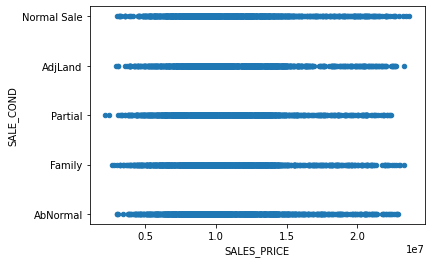

In [329]:
df.plot.scatter('SALES_PRICE','SALE_COND')

In [330]:
enc=OrdinalEncoder()

In [339]:
enc.fit_transform(df[["SALE_COND",'PARK_FACIL','DATE_BUILD','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE','PRT_ID']])

array([[0.000e+00, 1.000e+00, 2.731e+03, ..., 2.000e+00, 0.000e+00,
        2.266e+03],
       [0.000e+00, 0.000e+00, 4.226e+03, ..., 0.000e+00, 3.000e+00,
        6.664e+03],
       [0.000e+00, 1.000e+00, 1.511e+03, ..., 0.000e+00, 4.000e+00,
        1.270e+03],
       ...,
       [3.000e+00, 0.000e+00, 1.350e+02, ..., 0.000e+00, 2.000e+00,
        6.798e+03],
       [4.000e+00, 1.000e+00, 2.015e+03, ..., 2.000e+00, 4.000e+00,
        4.601e+03],
       [4.000e+00, 1.000e+00, 4.510e+03, ..., 2.000e+00, 2.000e+00,
        6.942e+03]])

In [342]:
df[["SALE_COND",'PARK_FACIL','DATE_BUILD','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']]=enc.fit_transform(df[["SALE_COND",'PARK_FACIL','DATE_BUILD','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']])

In [343]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,6.0,1004,310.0,131,1.0,1.0,3,0.0,1.0,...,0.0,2.0,0.0,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,1.0,1986,1745.0,26,2.0,1.0,5,0.0,0.0,...,0.0,0.0,3.0,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,4.0,909,288.0,70,1.0,1.0,3,0.0,1.0,...,1.0,0.0,4.0,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,3.0,1855,1117.0,14,3.0,2.0,5,2.0,0.0,...,3.0,2.0,2.0,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,6.0,1226,442.0,84,1.0,1.0,3,0.0,1.0,...,0.0,0.0,1.0,3.0,2.5,4.1,3.290,237000,74063,7406250


In [344]:
enc=OrdinalEncoder(categories='auto')

In [381]:
df[["SALE_COND",'PARK_FACIL','DATE_BUILD','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE','PRT_ID']]=enc.fit(df[["SALE_COND",'PARK_FACIL','DATE_BUILD','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE','PRT_ID']])

In [352]:
df.head(20)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,2266.0,6.0,1004,310.0,131,1.0,1.0,3,0.0,1.0,...,0.0,2.0,0.0,4.0,3.9,4.9,4.330000,380000,144400,7600000
1,6664.0,1.0,1986,1745.0,26,2.0,1.0,5,0.0,0.0,...,0.0,0.0,3.0,4.9,4.2,2.5,3.765000,760122,304049,21717770
2,1270.0,4.0,909,288.0,70,1.0,1.0,3,0.0,1.0,...,1.0,0.0,4.0,4.1,3.8,2.2,3.090000,421094,92114,13159200
3,3755.0,3.0,1855,1117.0,14,3.0,2.0,5,2.0,0.0,...,3.0,2.0,2.0,4.7,3.9,3.6,4.010000,356321,77042,9630290
4,4393.0,6.0,1226,442.0,84,1.0,1.0,3,0.0,1.0,...,0.0,0.0,1.0,3.0,2.5,4.1,3.290000,237000,74063,7406250
5,156.0,5.0,1220,984.0,36,2.0,1.0,4,4.0,0.0,...,2.0,1.0,3.0,4.5,2.6,3.1,3.320000,409027,198316,12394750
6,6447.0,5.0,1167,395.0,137,1.0,1.0,3,4.0,0.0,...,0.0,1.0,4.0,3.6,2.1,2.5,2.670000,263152,33955,8488790
7,6858.0,3.0,1847,1113.0,176,3.0,2.0,5,2.0,0.0,...,0.0,0.0,5.0,2.4,4.5,2.1,3.260000,604809,235204,16800250
8,2382.0,5.0,771,488.0,175,1.0,1.0,2,1.0,0.0,...,3.0,2.0,5.0,2.9,3.7,4.0,3.550000,257578,33236,8308970
9,6820.0,3.0,1635,1984.0,74,2.0,1.0,4,0.0,0.0,...,1.0,1.0,2.0,3.1,3.1,3.3,3.160000,323346,121255,8083650


In [359]:
df[["SALE_COND",'PARK_FACIL','DATE_BUILD','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']]=enc.fit_transform(df[["SALE_COND",'PARK_FACIL','DATE_BUILD','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']])

**Train the model on training dataset**

**Spliting Dataset**

In [364]:
x=df[['PRT_ID','AREA','INT_SQFT','DATE_SALE','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS']]
y=df['SALES_PRICE']

In [365]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [366]:
x_train.shape

(5687, 19)

In [373]:
x_train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
248,3420.0,3.0,1776,778.0,120,2.0,1.0,4,3.0,1.0,2.0,2.0,3.0,4.9,2.4,3.4,3.566667,319653,89903
1581,823.0,5.0,1165,634.0,108,1.0,1.0,3,4.0,0.0,3.0,1.0,5.0,4.2,3.0,3.5,3.510000,262280,98355
1777,729.0,1.0,1815,1380.0,48,2.0,1.0,5,4.0,0.0,2.0,1.0,5.0,5.0,3.4,3.0,3.800000,534986,178329
6981,3156.0,5.0,1179,1433.0,54,1.0,1.0,3,1.0,0.0,2.0,0.0,3.0,3.1,2.7,4.2,3.270000,268045,64701
3521,4305.0,4.0,1180,2286.0,69,1.0,1.0,3,2.0,0.0,0.0,2.0,4.0,4.6,3.5,4.1,4.130000,495815,28332


**Train the training dataset**

In [389]:
from sklearn.linear_model import LinearRegression

In [390]:
ml=LinearRegression()

In [391]:
ml.fit(x_train,y_train)

LinearRegression()

**Predict the test set results**

In [392]:
y_pred=ml.predict(x_test)
print(y_pred)

[ 9317030.30882722  8511263.69085414 14334607.08786616 ...
 10237213.78896915 14300427.11251113  5123104.55446191]


In [393]:
ml.predict([[2266.0,6.0,1004,310.0,131,1.0,1.0,3,0.0,1.0,0.0,2.0,0.0,4.0,3.9,4.9,4.330000,380000,144400]])

D:\ANACONDA\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9894722.85862746])

**Evaluate the model**

In [394]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8505075433899326

**Plot the results**

Text(0.5, 1.0, 'Actusl vs. Predicted')

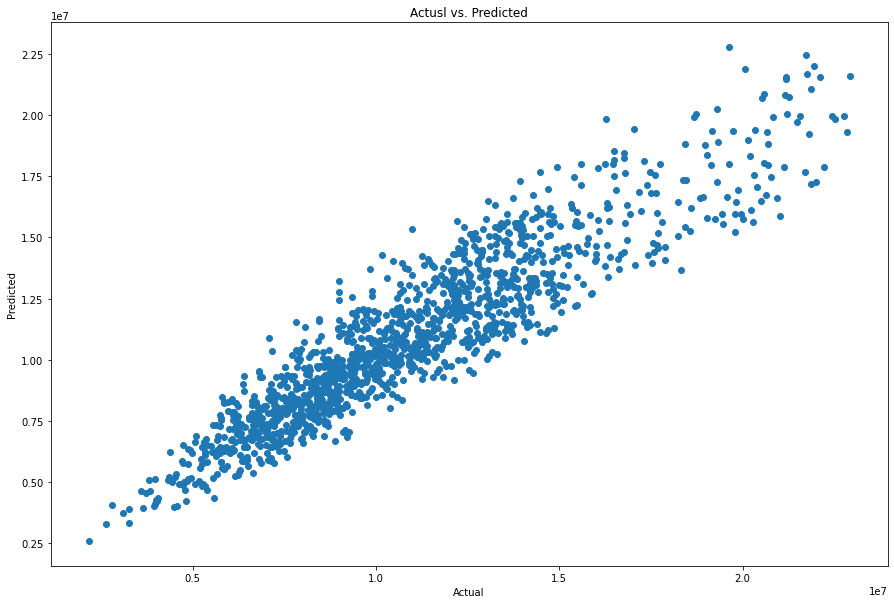

In [395]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actusl vs. Predicted')

**Predicted values**

In [380]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
2343,7763400,9.317030e+06,-1.553630e+06
733,7150500,8.511264e+06,-1.360764e+06
6694,12103000,1.433461e+07,-2.231607e+06
5030,8086950,9.087138e+06,-1.000188e+06
7095,13308750,1.270981e+07,5.989421e+05
3193,8052400,7.047990e+06,1.004410e+06
3650,13362600,1.195199e+07,1.410612e+06
1867,9626680,1.048389e+07,-8.572104e+05
1625,13940580,1.729604e+07,-3.355464e+06
5972,7204440,6.716135e+06,4.883048e+05
